In [2]:
import glob

from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()


In [3]:
FASTA="../data/gen/nguyen_nc_2018/20190702-fastas-on-hpc/1739/20lines/"

In [4]:
ff = glob.glob(f"{FASTA}*.fasta")
fsts = []
labels = []
for file in ff:
    labels.append(file.split("_")[0])
    for record in SeqIO.parse(file, "fasta"):
        fsts.append(list(str(record.seq))) 

In [141]:
diffs = [[0. for x in range(len(fsts))] for y in range(len(fsts))]
bits = {}
for i in range(0, len(fsts)):
        for j in range (0, len(fsts)):
            cntr = 0
            bit = np.zeros(len(fsts[i]),dtype=int)
            for k in range(len(fsts[i])):
                if fsts[i][k] != fsts[j][k]:
                    cntr +=1
                    bit[k] =  1
            bits[(labels[i],labels[j])] = bit
            diffs[i][j] = (1 - cntr/len(fsts[i]))*100

In [128]:
[bits[("A03","A04")][i] for i, b in enumerate(bits[("A01","A03")] != bits[("A01","A04")]) if b]

[1, 1, 1, 1, 1]

A03 and A04 are different in 5 mutations in respect to A01

In [139]:
[(i,("A01",fsts[0][i]), ("A03", fsts[labels.index("A03")][i]), ("A04",fsts[labels.index("A04")][i])) 
     for i, b in enumerate(bits[("A01","A03")] != bits[("A01","A04")]) if b]

[(149, ('A01', 'T'), ('A03', 'T'), ('A04', 'C')),
 (194, ('A01', 'C'), ('A03', 'T'), ('A04', 'C')),
 (722, ('A01', 'T'), ('A03', 'C'), ('A04', 'T')),
 (822, ('A01', 'T'), ('A03', 'C'), ('A04', 'T')),
 (962, ('A01', 'T'), ('A03', 'A'), ('A04', 'T'))]

In [142]:
df=pd.DataFrame(data=diffs, columns = labels, index=labels)            

In [143]:
df

,A01,A03,A04,A05,A06,A07,A09,A10,A12
A01,100.000000,90.438596,90.701754,80.000000,80.175439,90.789474,90.701754,45.964912,90.789474
A03,90.438596,100.000000,99.561404,88.859649,78.333333,99.649123,99.561404,46.140351,99.649123
A04,90.701754,99.561404,100.000000,89.122807,78.421053,99.912281,99.824561,46.140351,99.912281
A05,80.000000,88.859649,89.122807,100.000000,67.807018,89.035088,88.947368,46.403509,89.035088
A06,80.175439,78.333333,78.421053,67.807018,100.000000,78.333333,78.333333,47.105263,78.333333
A07,90.789474,99.649123,99.912281,89.035088,78.333333,100.000000,99.912281,46.052632,100.000000
A09,90.701754,99.561404,99.824561,88.947368,78.333333,99.912281,100.000000,46.140351,99.912281
A10,45.964912,46.140351,46.140351,46.403509,47.105263,46.052632,46.140351,100.000000,46.052632
A12,90.789474,99.649123,99.912281,89.035088,78.333333,100.000000,99.912281,46.052632,100.000000


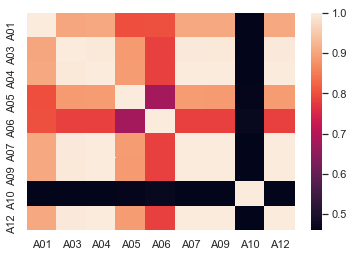

In [100]:

ax = sns.heatmap(df)